In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('covid_toy.csv')

In [4]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


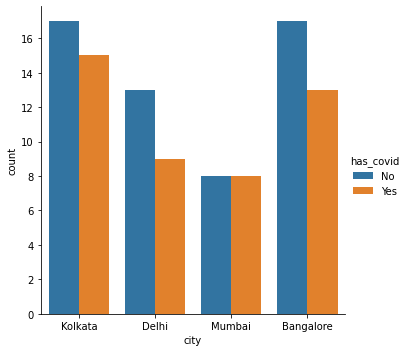

In [5]:
import seaborn as sns
#sns.relplot(y='fever',x='age',data=df,kind='scatter',hue='has_covid')
sns.catplot(x='city',kind='count',data=df,hue='has_covid')

In [6]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [8]:
X_train

,age,gender,fever,cough,city
99,10,Female,98.0,Strong,Kolkata
2,42,Male,101.0,Mild,Delhi
9,64,Female,101.0,Mild,Delhi
31,83,Male,103.0,Mild,Kolkata
4,65,Female,101.0,Mild,Mumbai
...,...,...,...,...,...
41,82,Male,NaN,Mild,Kolkata
67,65,Male,99.0,Mild,Bangalore
63,10,Male,100.0,Mild,Bangalore
8,19,Female,100.0,Strong,Bangalore


In [9]:
df['city'].unique()

array(['Kolkata', 'Delhi', 'Mumbai', 'Bangalore'], dtype=object)

## 1. Aam Zindagi

In [10]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [11]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [12]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 4)

In [13]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [14]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

## Mentos Zindagi

In [15]:
from sklearn.compose import ColumnTransformer
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [16]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [17]:
dd = pd.DataFrame(data=transformer.fit_transform(X_train))
dd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6
0,98.000000,1.0,0.0,0.0,1.0,0.0,10.0
1,101.000000,0.0,1.0,1.0,0.0,0.0,42.0
2,101.000000,0.0,0.0,1.0,0.0,0.0,64.0
3,103.000000,0.0,1.0,0.0,1.0,0.0,83.0
4,101.000000,0.0,0.0,0.0,0.0,1.0,65.0
...,...,...,...,...,...,...,...
75,100.805556,0.0,1.0,0.0,1.0,0.0,82.0
76,99.000000,0.0,1.0,0.0,0.0,0.0,65.0
77,100.000000,0.0,1.0,0.0,0.0,0.0,10.0
78,100.000000,1.0,0.0,0.0,0.0,0.0,19.0


In [18]:
dd.columns=df.columns
dd

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements